#1. Dataset Collection:
##1.1 Data Sources:

Utilized Roboflow as a primary data collection source.
Collected approximately 150 images for both resume and non-resume classes.
##1.2 Class Distribution:

Resume Images: 150

Non-Resume Images: 150

  {Newspapers: 30,Bills and Personal Collection (Phone): 30 ,Open Source Research Papers: ~90}

##1.3 Dataset Diversity:

Ensured diversity by including images from various sources, such as newspapers, bills, personal collection, and open-source research papers.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WQIX3N0AouohId9nmwju")
project = rf.workspace("ons-abderrahim").project("resume-parser2")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Resume-Parser2-1 in yolov8:: 100%|██████████| 2978/2978 [00:00<00:00, 4316.47it/s]


In [ ]:
!pip install gdown

import gdown
import shutil

# Destination directory where the user will download the data https://drive.google.com/file/d/1RkVBrUNRIu4HGqOLW-qUQVhvQGOznzFN/view?usp=sharing
destination_path = '/content'

# Direct download link for the ZIP file
folder_id ='1RkVBrUNRIu4HGqOLW-qUQVhvQGOznzFN'
zip_file_url = f'https://drive.google.com/uc?id={folder_id}'


# Download the ZIP file
zip_file_path = destination_path + '/TRAIN_DATA.zip'
gdown.download(zip_file_url, zip_file_path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1RkVBrUNRIu4HGqOLW-qUQVhvQGOznzFN
To: /content/TRAIN_DATA.zip
100%|██████████| 23.7M/23.7M [00:00<00:00, 31.3MB/s]


'/content/TRAIN_DATA.zip'

In [ ]:
# Extract the downloaded ZIP file
shutil.unpack_archive(zip_file_path, destination_path)

print("Data has been downloaded and extracted to:", destination_path)

Data has been downloaded and extracted to: /content


In [ ]:
import os

# Specify the root folder
root_folder = '/content/'

# Create 'DATA' folder
data_folder = os.path.join(root_folder, 'DATA')
os.makedirs(data_folder, exist_ok=True)

# Create 'Resume' folder inside 'DATA'
resume_folder = os.path.join(data_folder, 'Resume')
os.makedirs(resume_folder, exist_ok=True)

# Create 'Not_Resume' folder inside 'DATA'
not_resume_folder = os.path.join(data_folder, 'Not_Resume')
os.makedirs(not_resume_folder, exist_ok=True)


# Image display

(1003, 736, 3)
(3579, 2551, 3)
(800, 620, 3)
(1130, 800, 3)
(632, 474, 3)
(1032, 800, 3)
(693, 491, 3)
(3579, 2551, 3)
(842, 595, 3)
(645, 456, 3)


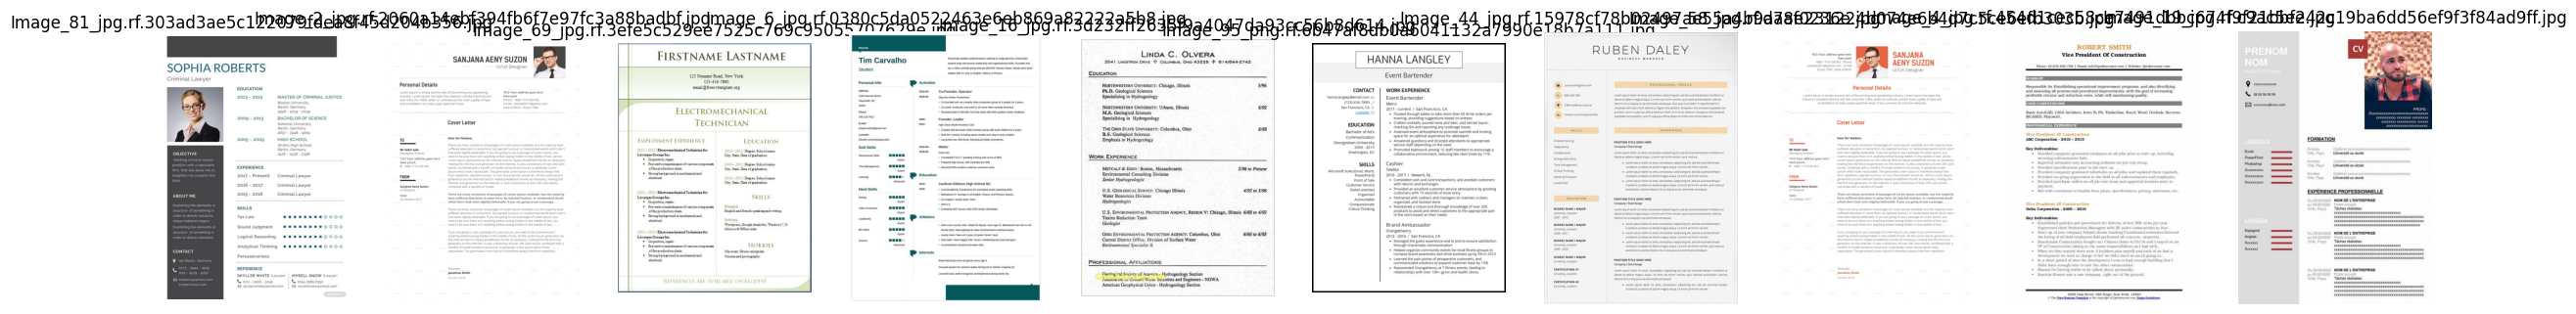

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

def display_random_images(folder_path, num_images=10):
    # Get a list of all files in the folder
    all_files = os.listdir(folder_path)

    # Filter only image files (you can adjust this based on your image file extensions)
    image_files = [file for file in all_files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Select random images
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    # Display the selected images using matplotlib
    plt.figure(figsize=(30, 30))
    for i, image_file in enumerate(selected_images, 1):
        image_path = os.path.join(folder_path, image_file)
        img = imread(image_path)
        print(img.shape)

        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_file)

    plt.show()

# Replace 'your_folder_path' with the path to your image folder
folder_path1 = '/content/Resume-Parser2-1/test/images'
display_random_images(folder_path1)

# Replace 'your_folder_path' with the path to your image folder
folder_path2 = '/content/notresume'
display_random_images(folder_path2)


In [ ]:
import os
import shutil
from natsort import natsorted

def rename_and_copy_images(src_folder, dest_folder):
    # Get a list of all files in the source folder and sort them naturally
    files = natsorted(os.listdir(src_folder))

    # Filter out non-image files (you can adjust the list of valid extensions)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Rename each image with the 'resume' prefix and a number, then copy to the destination folder
    for i, file in enumerate(image_files, start=1):
        _, extension = os.path.splitext(file)
        new_name = f"resume{i}{extension}"

        old_path = os.path.join(src_folder, file)
        new_path = os.path.join(dest_folder, new_name)

        # Rename the image and copy it to the destination folder
        shutil.copy2(old_path, new_path)
        print(f"Copied and Renamed: {file} -> {new_name}")

# Replace 'your_src_folder' and 'your_dest_folder' with the source and destination folder paths
src_folder_resume = '/content/Resume-Parser2-1/test/images/'
dest_folder_resume = '/content/DATA/Resume/'

# Create the destination folder if it doesn't exist
os.makedirs(dest_folder_resume, exist_ok=True)


# Call the function to rename and copy images
rename_and_copy_images(src_folder_resume, dest_folder_resume)



Copied and Renamed: Caffffffpture_PNG.rf.1e50b21ad39cc3f9202dab036c6da171.jpg -> resume1.jpg
Copied and Renamed: Caffffffpture_PNG.rf.cf140d416197fe5534af5af92205e994.jpg -> resume2.jpg
Copied and Renamed: Caffffffpture_PNG.rf.d51b8109de484065319a889b3a9d9bc2.jpg -> resume3.jpg
Copied and Renamed: Capture_PNG.rf.1b18c0d5c1a7ddf7c969378a121bb0d8.jpg -> resume4.jpg
Copied and Renamed: Capture_PNG.rf.9b76c59dd2c3badcee96e15f046d193d.jpg -> resume5.jpg
Copied and Renamed: Capture_PNG.rf.d86307a4885a46624a715f7db6741ca0.jpg -> resume6.jpg
Copied and Renamed: Image_2_jpg.rf.3a1d721103dbe995ce787cd148a56e94.jpg -> resume7.jpg
Copied and Renamed: Image_2_jpg.rf.9dfbffcdf7c22a93cf0a683d39e9ef0c.jpg -> resume8.jpg
Copied and Renamed: Image_2_jpg.rf.2060a14ebf394fb6f7e97fc3a88badbf.jpg -> resume9.jpg
Copied and Renamed: Image_2_jpg.rf.757859d7b0d69f328c82a16acc99b59d.jpg -> resume10.jpg
Copied and Renamed: Image_2_jpg.rf.bd9a103fca9416768e6e00f184e7148f.jpg -> resume11.jpg
Copied and Renamed: Ima

In [ ]:
image_list = [os.path.join('/content/DATA/Resume', img) for img in os.listdir('/content/DATA/Resume')]
print(len(image_list))
image_count=len(image_list)

148


In [ ]:
def rename_and_copy_images2(src_folder, dest_folder):
    # Get a list of all files in the source folder and sort them naturally
    files = natsorted(os.listdir(src_folder))

    # Filter out non-image files (you can adjust the list of valid extensions)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Rename each image with the 'resume' prefix and a number, then copy to the destination folder
    for i, file in enumerate(image_files, start=1):
        _, extension = os.path.splitext(file)
        new_name = f"not_resume{i}{extension}"

        old_path = os.path.join(src_folder, file)
        new_path = os.path.join(dest_folder, new_name)

        # Rename the image and copy it to the destination folder
        shutil.copy2(old_path, new_path)
        print(f"Copied and Renamed: {file} -> {new_name}")


src_folder_not_resume = '/content/notresume/'
dest_folder_not_resume = '/content/DATA/Not_Resume/'

# Create the destination folder if it doesn't exist
os.makedirs(dest_folder_not_resume, exist_ok=True)


# Call the function to rename and copy images
rename_and_copy_images2(src_folder_not_resume, dest_folder_not_resume)


Copied and Renamed: 0.jpg -> not_resume1.jpg
Copied and Renamed: 1.jpeg -> not_resume2.jpeg
Copied and Renamed: 001.jpg -> not_resume3.jpg
Copied and Renamed: 1.jpg -> not_resume4.jpg
Copied and Renamed: 002.jpeg -> not_resume5.jpeg
Copied and Renamed: 2.jpeg -> not_resume6.jpeg
Copied and Renamed: 2.jpg -> not_resume7.jpg
Copied and Renamed: 003.JPG -> not_resume8.JPG
Copied and Renamed: 3.jpeg -> not_resume9.jpeg
Copied and Renamed: 3.png -> not_resume10.png
Copied and Renamed: 4.jpeg -> not_resume11.jpeg
Copied and Renamed: 4.jpg -> not_resume12.jpg
Copied and Renamed: 004.jpg -> not_resume13.jpg
Copied and Renamed: 5.jpeg -> not_resume14.jpeg
Copied and Renamed: 5.jpg -> not_resume15.jpg
Copied and Renamed: 005.jpg -> not_resume16.jpg
Copied and Renamed: 6.jpeg -> not_resume17.jpeg
Copied and Renamed: 6.png -> not_resume18.png
Copied and Renamed: 006.png -> not_resume19.png
Copied and Renamed: 7.jpg -> not_resume20.jpg
Copied and Renamed: 007.png -> not_resume21.png
Copied and Rena

In [ ]:
image_list = [os.path.join('/content/DATA/Not_Resume', img) for img in os.listdir('/content/DATA/Not_Resume')]
print(len(image_list))
image_count=len(image_list)

311


In [ ]:
from PIL import Image
import os

def print_image_info(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Filter out non-image files (you can adjust the list of valid extensions)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Sort the image files to ensure consistent output
    image_files.sort()

    # Print information for each image
    for i, file in enumerate(image_files, start=1):
        image_path = os.path.join(folder_path, file)

        # Open the image
        img = Image.open(image_path)

        # Get the size of the image
        size = img.size

        # Get the shape of the image
        shape = img.size[::-1] + (len(img.getbands()),)

        # Print information
        print(f"Image {i}: {file}")
        print(f"Size: {size} pixels")
        print(f"Shape: {shape}")
        print("--------------------------")

    # Print total count of images
    print(f"Total Count of Images: {len(image_files)}")

# Replace 'your_folder_path' with the path to your image folder
folder_path = '/content/DATA/Resume/'

# Call the function to print image information
print_image_info(folder_path)


Image 1: resume1.jpg
Size: (398, 552) pixels
Shape: (552, 398, 3)
--------------------------
Image 2: resume10.jpg
Size: (2551, 3579) pixels
Shape: (3579, 2551, 3)
--------------------------
Image 3: resume100.jpg
Size: (303, 389) pixels
Shape: (389, 303, 3)
--------------------------
Image 4: resume101.jpg
Size: (491, 693) pixels
Shape: (693, 491, 3)
--------------------------
Image 5: resume102.jpg
Size: (491, 693) pixels
Shape: (693, 491, 3)
--------------------------
Image 6: resume103.jpg
Size: (491, 693) pixels
Shape: (693, 491, 3)
--------------------------
Image 7: resume104.jpg
Size: (612, 792) pixels
Shape: (792, 612, 3)
--------------------------
Image 8: resume105.jpg
Size: (612, 792) pixels
Shape: (792, 612, 3)
--------------------------
Image 9: resume106.jpg
Size: (609, 790) pixels
Shape: (790, 609, 3)
--------------------------
Image 10: resume107.jpg
Size: (609, 790) pixels
Shape: (790, 609, 3)
--------------------------
Image 11: resume108.jpg
Size: (609, 790) pixels


# 2. Data Augmentation

Implemented data augmentation using the TensorFlow ImageDataGenerator with various transformations, such as rotation, width and height shifts, shear, zoom, brightness adjustments, and horizontal flipping.


Augmented each class to have a total of 300 images (original + augmented).

The augmented dataset enhances the model's robustness and generalization to various visual characteristics.




In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm  # For progress bars

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment and save images in the same folder
def augment_and_save(input_folder, target_count):
    # Load images from the input folder
    image_list = [os.path.join(input_folder, img) for img in os.listdir(input_folder)]

    # Calculate the number of images to generate
    images_to_generate = target_count - image_count

    # Loop through the images and perform data augmentation
    for img_path in tqdm(image_list, desc=f'Augmenting {input_folder}'):
        img = tf.keras.preprocessing.image.load_img(img_path)
        x = tf.keras.preprocessing.image.img_to_array(img)
        x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=input_folder, save_prefix='aug', save_format='png'):
            i += 1
            if i >= images_to_generate:
                break  # Break the loop after reaching the target count

            # Check if the total count (original + augmented) has reached the target
            if len(os.listdir(input_folder)) >= target_count:
                break

# Define paths
input_resume_folder = "/content/DATA/Resume"
input_not_resume_folder="/content/DATA/Not_Resume"

# Set the target count for each class
target_count_per_class = 250-97 # Adjusted to 250 to have 148 original + 102 augmented images

# Augment and save images for the 'Resume' class
augment_and_save(input_resume_folder, target_count_per_class)

augment_and_save(input_not_resume_folder, target_count_per_class-10)



Augmenting /content/DATA/Not_Resume: 100%|██████████| 156/156 [00:44<00:00,  3.49it/s]


## Downloading Augmented Data into Local Computer

In [ ]:
import shutil

# Replace 'your_folder_path' with the path to your folder
folder_path = '/content/DATA'

# Specify the output path for the ZIP file
zip_file_path = '/content/DATA.zip'

# Create a ZIP file of the folder
shutil.make_archive(zip_file_path[:-4], 'zip', folder_path)


'/content/DATA.zip'

In [ ]:
from google.colab import files

# Download the ZIP file to your local system
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>